# TorchBNN: Classification

In [4]:
#%pip install torchbnn

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

## Dataset & Preprocessing

### Load Dataset

In [2]:
iris = pd.read_csv('../dataset/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Selection

In [13]:
X = iris.drop('species', axis=1).values
Y = iris['species'].values 

### Torch 변환

In [14]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

## Define Model

In [15]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

In [16]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

## Train Model

In [17]:
kl_weight = 0.1

In [18]:
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f'Epoch {step}: | Loss: {cost}')
    
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

Epoch 0: | Loss: tensor([1.3011], grad_fn=<AddBackward0>)
Epoch 100: | Loss: tensor([0.6143], grad_fn=<AddBackward0>)
Epoch 200: | Loss: tensor([0.3772], grad_fn=<AddBackward0>)
Epoch 300: | Loss: tensor([0.5597], grad_fn=<AddBackward0>)
Epoch 400: | Loss: tensor([0.2779], grad_fn=<AddBackward0>)
Epoch 500: | Loss: tensor([0.3130], grad_fn=<AddBackward0>)
Epoch 600: | Loss: tensor([0.3383], grad_fn=<AddBackward0>)
Epoch 700: | Loss: tensor([0.2662], grad_fn=<AddBackward0>)
Epoch 800: | Loss: tensor([0.6207], grad_fn=<AddBackward0>)
Epoch 900: | Loss: tensor([0.2672], grad_fn=<AddBackward0>)
Epoch 1000: | Loss: tensor([0.2746], grad_fn=<AddBackward0>)
Epoch 1100: | Loss: tensor([0.2407], grad_fn=<AddBackward0>)
Epoch 1200: | Loss: tensor([0.3185], grad_fn=<AddBackward0>)
Epoch 1300: | Loss: tensor([0.2526], grad_fn=<AddBackward0>)
Epoch 1400: | Loss: tensor([0.2616], grad_fn=<AddBackward0>)
Epoch 1500: | Loss: tensor([0.2410], grad_fn=<AddBackward0>)
Epoch 1600: | Loss: tensor([0.2464],

## Test Model

In [19]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

## Visualization

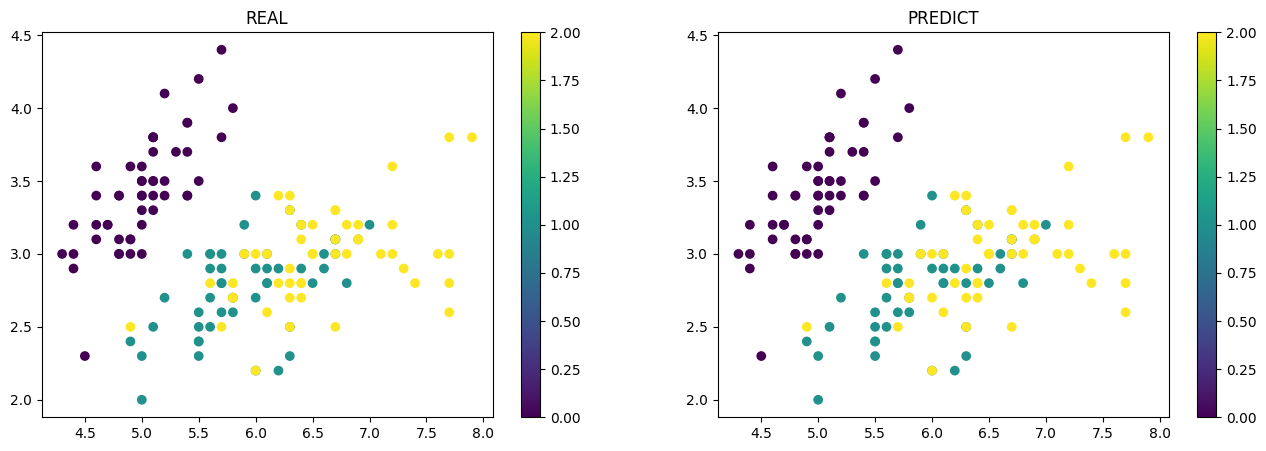

In [20]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

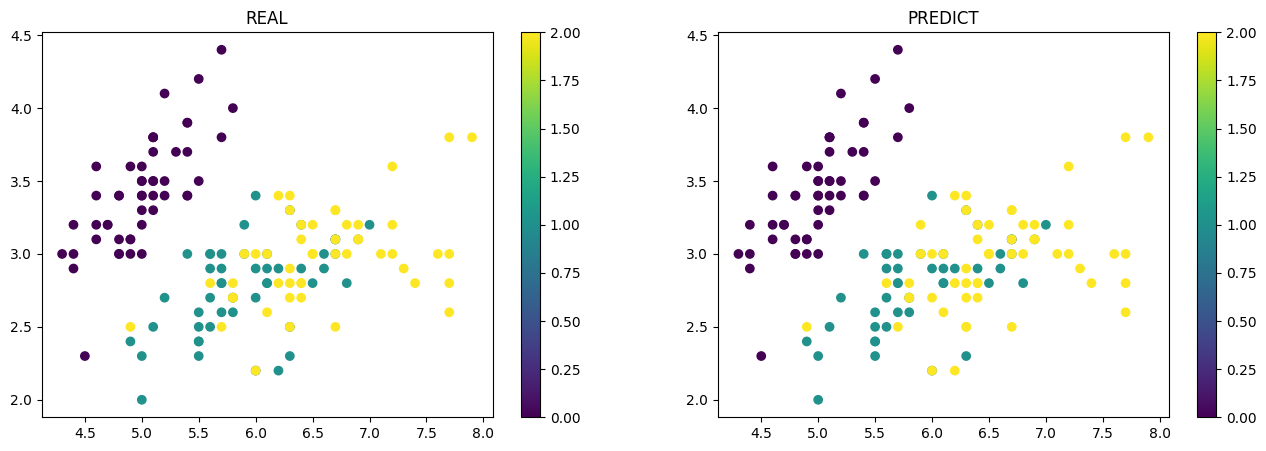

In [22]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)